In [43]:
import pandas as pd
# Завантаження даних
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
# Об'єднання даних
data = pd.merge(ratings, movies, on='movieId')

In [45]:
# Середній рейтинг по всіх фільмах
C = data['rating'].mean()
# Групування даних по фільмах
movie_stats = data.groupby('title').agg({
    'rating': ['mean', 'count']})
movie_stats.columns = movie_stats.columns.droplevel()
movie_stats.rename(columns={'mean': 'mean_rating', 'count': 'rating_count'}, inplace=True)
# Мінімальна кількість голосів для включення
m = movie_stats['rating_count'].quantile(0.90)
# Фільтруємо фільми, які мають достатньо голосів
qualified = movie_stats[movie_stats['rating_count'] >= m].copy()


In [213]:
import time
# Сортування фільмів за середнім рейтингом
start_time = time.time()
top_movies_freq = movie_stats.sort_values('mean_rating', ascending=False)
freq_time = time.time() - start_time
# Виведення топ-15 фільмів за частотним підходом
top_movies_freq['bayesian_rating'] = top_movies_freq.apply(lambda x: bayesian_rating(x, C, m), axis=1)
top_movies_freq = top_movies_freq.sort_values('mean_rating', ascending=False)
print("Топ-15 фільмів за середнім рейтингом (частотний підхід):")
top_movies_freq[['mean_rating',"bayesian_rating", 'rating_count']].head(10))

Топ-15 фільмів за середнім рейтингом (частотний підхід):


,mean_rating,bayesian_rating,rating_count
title,,,
Prep School (2016),5.0,3.546211,1
Attacking the Darkness (2015),5.0,3.546211,1
Once Upon a Date (2017),5.0,3.546211,1
Room Full of Spoons (2016),5.0,3.546211,1
Root of the Problem (2019),5.0,3.546211,1
Rough Stuff (2016),5.0,3.546211,1
Roxie (2014),5.0,3.546211,1
Roxy Hunter and the Myth of the Mermaid (2008),5.0,3.546211,1
Where is my home (2017),5.0,3.546211,1


In [103]:
# Функція для обчислення баєсівського рейтингу
def bayesian_rating(row, C, m):
    v = row['rating_count']
    R = row['mean_rating']
    return (R * v + C * m) / (v + m)
# Додаємо стовпець з баєсівським рейтингом
start_time = time.time()
qualified['bayesian_rating'] = qualified.apply(lambda x: bayesian_rating(x, C, m), axis=1)
top_movies_bayes = qualified.sort_values('bayesian_rating', ascending=False)
bayes_time = time.time() - start_time
# Виведення топ-10 фільмів за баєсівським підходом
print("Топ-10 фільмів за баєсівським рейтингом:")
print(top_movies_bayes[['bayesian_rating', 'rating_count']].head(10))

Топ-10 фільмів за баєсівським рейтингом:
                                             bayesian_rating  rating_count
title                                                                     
Shawshank Redemption, The (1994)                    4.402520        102929
Planet Earth (2006)                                 4.373702          2948
Band of Brothers (2001)                             4.354165          2811
Planet Earth II (2016)                              4.344106          1956
Godfather, The (1972)                               4.314119         66440
Parasite (2019)                                     4.296065         11670
Usual Suspects, The (1995)                          4.262406         67750
Godfather: Part II, The (1974)                      4.260294         43111
12 Angry Men (1957)                                 4.257116         21863
Seven Samurai (Shichinin no samurai) (1954)         4.239056         16531


In [127]:
print(f"Час виконання частотного підходу: {freq_time:.6f} секунд")
print(f"Час виконання баєсівського підходу: {bayes_time:.6f} секунд")
print(f"Різниця в часі між підходами: {bayes_time/freq_time:.6f} разів")


Час виконання частотного підходу: 0.017955 секунд
Час виконання баєсівського підходу: 0.123705 секунд
Різниця в часі між підходами: 6.889891 разів


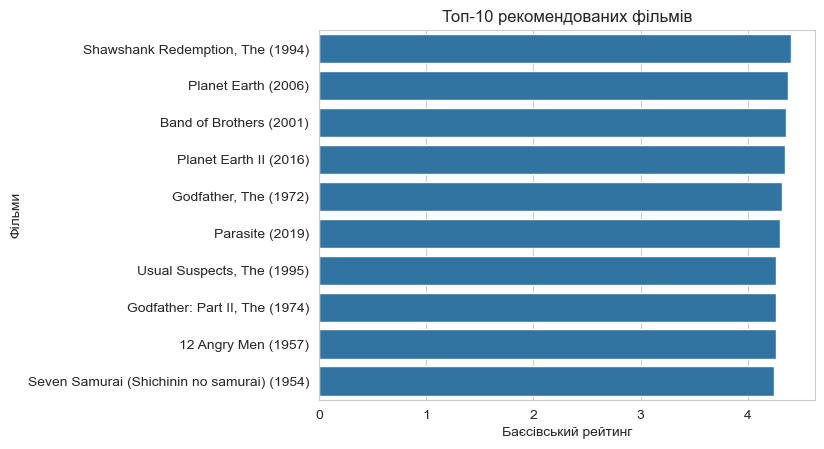

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Графік топ-10 фільмів
sns.barplot(x='bayesian_rating', y=top_movies_bayes.index[:10], data=top_movies_bayes.head(10))
plt.xlabel('Баєсівський рейтинг')
plt.ylabel('Фільми')
plt.title('Топ-10 рекомендованих фільмів')
plt.show()

In [205]:
# Топ-10 фільмів за частотним підходом
print("Топ-10 за частотним підходом:")
print(top_movies_freq[['mean_rating', 'rating_count']].head(10))
# Топ-10 фільмів за баєсівським підходом
print("\nТоп-10 за баєсівським підходом:")
print(top_movies_bayes[['bayesian_rating', 'rating_count']].head(10))

Топ-10 за частотним підходом:
                               mean_rating  rating_count
title                                                   
Prep School (2016)                     5.0             1
Lost Rivers (2013)                     5.0             1
Lost Woods (2012)                      5.0             1
Sweet Kill (1972)                      5.0             1
Sweet Home Carolina (2017)             5.0             1
Feminism WTF (2023)                    5.0             1
Female Misbehavior (1992)              5.0             1
Fell, Jumped or Pushed (2016)          5.0             1
Sweet Carolina (2021)                  5.0             1
Sweet As (2022)                        5.0             1

Топ-10 за баєсівським підходом:
   bayesian_rating  rating_count  mean_rating
0         4.402520        102929     4.404614
1         4.373702          2948     4.444369
2         4.354165          2811     4.426539
3         4.344106          1956     4.446830
4         4.314119     

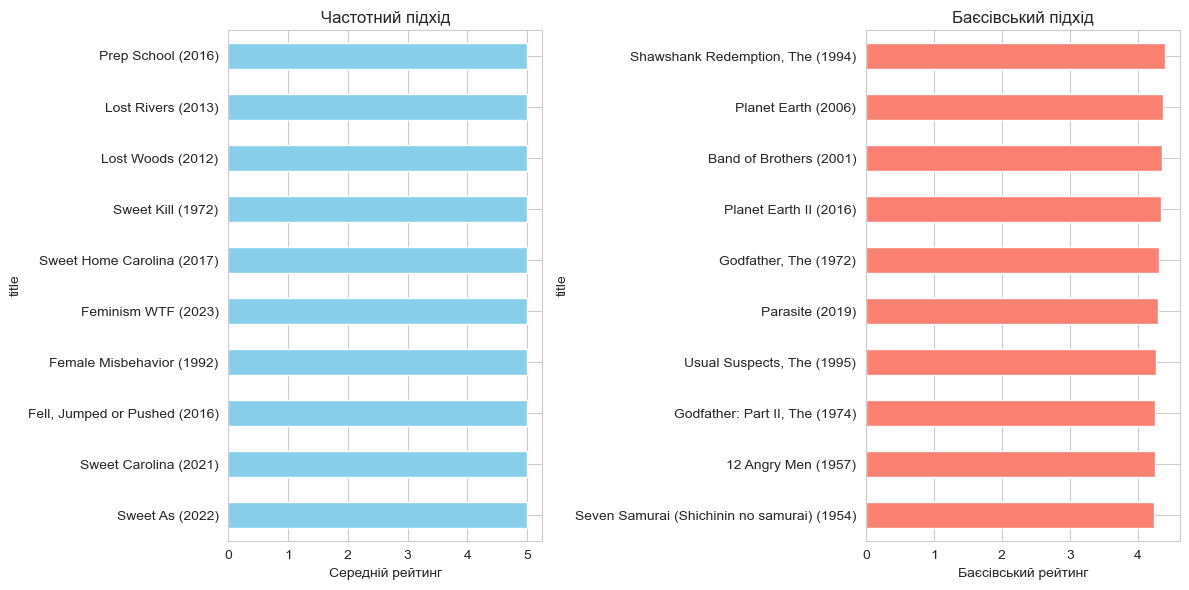

In [57]:
import matplotlib.pyplot as plt
# Графік порівняння
plt.figure(figsize=(12, 6))
# Частотний підхід
plt.subplot(1, 2, 1)
top_movies_freq['mean_rating'].head(10).plot(kind='barh', color='skyblue')
plt.title('Частотний підхід')
plt.xlabel('Середній рейтинг')
plt.gca().invert_yaxis()
# Баєсівський підхід
plt.subplot(1, 2, 2)
top_movies_bayes['bayesian_rating'].head(10).plot(kind='barh', color='salmon')
plt.title('Баєсівський підхід')
plt.xlabel('Баєсівський рейтинг')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [199]:
m

250.0

In [ ]:
qualified['bayesian_rating'] = qualified.apply(lambda x: bayesian_rating(x, C, m), axis=1)
top_movies_bayes = qualified.sort_values('bayesian_rating', ascending=False)

In [201]:
table = top_movies_bayes[["title", "rating_count", "mean_rating", "bayesian_rating"]]
table.sort_values('mean_rating', ascending=False).head(10)


,title,rating_count,mean_rating,bayesian_rating
3,Planet Earth II (2016),1956,4.446830,4.344106
1,Planet Earth (2006),2948,4.444369,4.373702
2,Band of Brothers (2001),2811,4.426539,4.354165
0,"Shawshank Redemption, The (1994)",102929,4.404614,4.402520
73,Cosmos,615,4.330081,4.101848
4,"Godfather, The (1972)",66440,4.317030,4.314119
5,Parasite (2019),11670,4.312254,4.296065
27,Blue Planet II (2017),1163,4.300086,4.165675
28,Twin Peaks (1989),1140,4.298684,4.162301
197,Twelve Angry Men (1954),449,4.286192,4.019455


In [159]:
# Фільми з малою кількістю голосів (<1000)
small_sample = top_movies_bayes[top_movies_bayes['rating_count'] < 1000]
mean_diff = (small_sample['mean_rating'] - small_sample['bayesian_rating']).mean()

print(f"Середня різниця між частотним і баєсівським рейтингами для малих вибірок: {mean_diff:.4f}")


Середня різниця між частотним і баєсівським рейтингами для малих вибірок: -0.0988


In [163]:
large_sample = top_movies_bayes[top_movies_bayes['rating_count'] > 10000]
mean_diff_large = (large_sample['mean_rating'] - large_sample['bayesian_rating']).mean()

print(f"Середня різниця між частотним і баєсівським рейтингами для великих вибірок: {mean_diff_large:.4f}")


Середня різниця між частотним і баєсівським рейтингами для великих вибірок: 0.0005


In [75]:
# Кореляція в частотному підході
corr_freq = movie_stats['mean_rating'].corr(movie_stats['rating_count'])

# Кореляція в баєсівському підході
corr_bayes = qualified['bayesian_rating'].corr(qualified['rating_count'])

print(f"Кореляція в частотному підході: {corr_freq}")
print(f"Кореляція в баєсівському підході: {corr_bayes}")


Кореляція в частотному підході: 0.09776646829576661
Кореляція в баєсівському підході: 0.23199416194575326
